In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\asamm\Documents\Data Science Practice\nhl_draft_python.csv")

In [3]:
df = df[df["games_played"] > 100]

In [4]:
df_positions = df[df['position'] != 'G']

In [5]:
df_positions.corr()

,year,overall_pick,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,...,Points Per Game,Hall Of Famer,100+ Games (Player),500+ Games (Player),1000+ Games (Player),500+ Points,1000+ Points,100+ Wins,350+ Wins,Top15Pick
year,1.000000,0.092416,-0.281924,0.950785,-0.177690,-0.163821,-0.182076,-0.180375,-0.013784,-0.318918,...,-0.152030,-0.144720,NaN,-0.166253,-0.109564,-0.130801,-0.097295,NaN,NaN,-0.039004
overall_pick,0.092416,1.000000,0.228662,0.098969,-0.187470,-0.216634,-0.220131,-0.225762,-0.019513,-0.101166,...,-0.221163,-0.085558,NaN,-0.152147,-0.143966,-0.193985,-0.103069,NaN,NaN,-0.517783
age,-0.281924,0.228662,1.000000,-0.338487,-0.066439,-0.042833,-0.035656,-0.039773,0.027467,-0.009029,...,0.029504,0.036578,NaN,-0.032007,-0.073038,-0.058092,-0.017956,NaN,NaN,-0.138031
to_year,0.950785,0.098969,-0.338487,1.000000,0.083709,0.005733,0.017046,0.012911,0.065253,-0.149200,...,-0.080482,-0.061084,NaN,0.050205,0.064674,0.020877,-0.005623,NaN,NaN,-0.018369
games_played,-0.177690,-0.187470,-0.066439,0.083709,1.000000,0.740224,0.837976,0.824459,0.297085,0.602472,...,0.473848,0.330218,NaN,0.829731,0.674847,0.634767,0.384015,NaN,NaN,0.266112
goals,-0.163821,-0.216634,-0.042833,0.005733,0.740224,1.000000,0.872320,0.953224,0.307665,0.333392,...,0.807720,0.452033,NaN,0.569197,0.565410,0.787108,0.584915,NaN,NaN,0.295433
assists,-0.182076,-0.220131,-0.035656,0.017046,0.837976,0.872320,1.000000,0.979304,0.409073,0.394941,...,0.766850,0.512567,NaN,0.636997,0.653249,0.794223,0.605975,NaN,NaN,0.309324
points,-0.180375,-0.225762,-0.039773,0.012911,0.824459,0.953224,0.979304,1.000000,0.380250,0.382163,...,0.808428,0.503991,NaN,0.629415,0.637895,0.816818,0.616744,NaN,NaN,0.313521
plus_minus,-0.013784,-0.019513,0.027467,0.065253,0.297085,0.307665,0.409073,0.380250,1.000000,0.130725,...,0.292218,0.418444,NaN,0.198283,0.270415,0.296308,0.298196,NaN,NaN,0.038612
penalties_minutes,-0.318918,-0.101166,-0.009029,-0.149200,0.602472,0.333392,0.394941,0.382163,0.130725,1.000000,...,0.087206,0.169116,NaN,0.505374,0.398719,0.285338,0.191002,NaN,NaN,0.128626


In [6]:
df_positions1 = df_positions[['games_played', 'goals', 'assists', 'points', 'Points Per Game', 'Hall Of Famer', '100+ Games (Player)', '500+ Games (Player)', '1000+ Games (Player)', '500+ Points', '1000+ Points', 'Top15Pick']]

In [7]:
features = list(df_positions1.columns)
data = df_positions1[features]

In [8]:
data.dtypes

games_played              int64
goals                     int64
assists                   int64
points                    int64
Points Per Game         float64
Hall Of Famer             int64
100+ Games (Player)       int64
500+ Games (Player)       int64
1000+ Games (Player)      int64
500+ Points               int64
1000+ Points              int64
Top15Pick                 int64
dtype: object

In [9]:
data.corr()

,games_played,goals,assists,points,Points Per Game,Hall Of Famer,100+ Games (Player),500+ Games (Player),1000+ Games (Player),500+ Points,1000+ Points,Top15Pick
games_played,1.000000,0.740224,0.837976,0.824459,0.473848,0.330218,NaN,0.829731,0.674847,0.634767,0.384015,0.266112
goals,0.740224,1.000000,0.872320,0.953224,0.807720,0.452033,NaN,0.569197,0.565410,0.787108,0.584915,0.295433
assists,0.837976,0.872320,1.000000,0.979304,0.766850,0.512567,NaN,0.636997,0.653249,0.794223,0.605975,0.309324
points,0.824459,0.953224,0.979304,1.000000,0.808428,0.503991,NaN,0.629415,0.637895,0.816818,0.616744,0.313521
Points Per Game,0.473848,0.807720,0.766850,0.808428,1.000000,0.354419,NaN,0.386852,0.328259,0.642618,0.414585,0.299809
Hall Of Famer,0.330218,0.452033,0.512567,0.503991,0.354419,1.000000,NaN,0.167510,0.337893,0.355693,0.601773,0.142990
100+ Games (Player),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500+ Games (Player),0.829731,0.569197,0.636997,0.629415,0.386852,0.167510,NaN,1.000000,0.366448,0.440100,0.175708,0.223970
1000+ Games (Player),0.674847,0.565410,0.653249,0.637895,0.328259,0.337893,NaN,0.366448,1.000000,0.577915,0.443639,0.189329
500+ Points,0.634767,0.787108,0.794223,0.816818,0.642618,0.355693,NaN,0.440100,0.577915,1.000000,0.395607,0.240226


In [10]:
data

,games_played,goals,assists,points,Points Per Game,Hall Of Famer,100+ Games (Player),500+ Games (Player),1000+ Games (Player),500+ Points,1000+ Points,Top15Pick
448,135,31,21,52,0.385185,0,1,0,0,0,0,1
450,132,34,53,87,0.659091,0,1,0,0,0,0,1
453,105,7,33,40,0.380952,0,1,0,0,0,0,1
664,166,44,64,108,0.650602,0,1,0,0,0,0,1
665,157,26,32,58,0.369427,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12229,748,116,169,285,0.381016,0,1,1,0,0,0,1
12230,883,288,485,773,0.875425,0,1,1,0,1,0,1
12234,955,214,392,606,0.634555,0,1,1,0,1,0,1
12245,604,82,247,329,0.544702,0,1,1,0,0,0,0


In [11]:
data1 = df_positions[['games_played', 'goals', 'assists', 'points', 'Points Per Game', 'Hall Of Famer', '100+ Games (Player)', '500+ Games (Player)', '1000+ Games (Player)', '500+ Points', '1000+ Points', 'Top15Pick']].reset_index()

In [12]:
data1 = data1.reset_index()

In [13]:
data1 = data1.drop(['level_0'],axis=1)

In [14]:
data1

,index,games_played,goals,assists,points,Points Per Game,Hall Of Famer,100+ Games (Player),500+ Games (Player),1000+ Games (Player),500+ Points,1000+ Points,Top15Pick
0,448,135,31,21,52,0.385185,0,1,0,0,0,0,1
1,450,132,34,53,87,0.659091,0,1,0,0,0,0,1
2,453,105,7,33,40,0.380952,0,1,0,0,0,0,1
3,664,166,44,64,108,0.650602,0,1,0,0,0,0,1
4,665,157,26,32,58,0.369427,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,12229,748,116,169,285,0.381016,0,1,1,0,0,0,1
2756,12230,883,288,485,773,0.875425,0,1,1,0,1,0,1
2757,12234,955,214,392,606,0.634555,0,1,1,0,1,0,1
2758,12245,604,82,247,329,0.544702,0,1,1,0,0,0,0


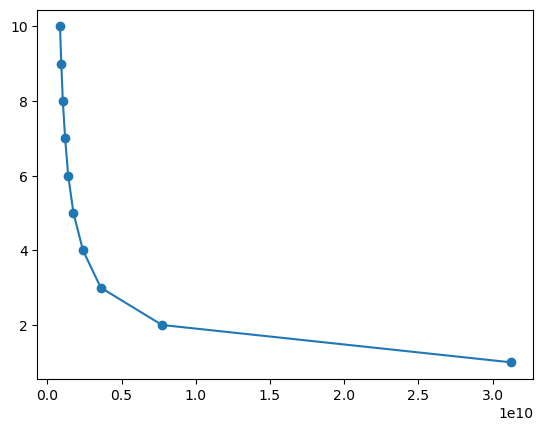

In [15]:
inertias = []
cluster_range = range(1,11)
for i in cluster_range:
    kmeans = KMeans(init='random',n_clusters=i,n_init=100,random_state=42).fit(data1)
    inertias.append(kmeans.inertia_)
    
plt.figure()   
plt.plot(inertias,cluster_range,marker='o')
plt.show()

# Joined the label on data, copied from website that used assign, rather than join

In [16]:
kmeans_sel = KMeans(init='random',n_clusters=4,n_init=100,random_state=42).fit(data1)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = data1.join(labels)

In [17]:
kmeans_sel.cluster_centers_

array([[ 4.86617265e+03,  5.63646154e+02,  8.73914530e+01,
         1.49514530e+02,  2.36905983e+02,  3.47981471e-01,
         5.12820513e-03,  1.00000000e+00,  5.17948718e-01,
         1.31623932e-01,  1.43589744e-01,  1.88034188e-02,
         1.81196581e-01],
       [ 2.31526918e+03,  3.90264834e+02,  6.84963821e+01,
         1.11263386e+02,  1.79759768e+02,  4.00058971e-01,
        -1.38777878e-17,  1.00000000e+00,  3.01013025e-01,
         1.59189580e-02,  7.52532562e-02,  2.89435601e-03,
         2.53256151e-01],
       [ 1.06441541e+04,  5.57365591e+02,  1.16560335e+02,
         1.93157706e+02,  3.09718041e+02,  4.86697415e-01,
         5.85424134e-02,  1.00000000e+00,  5.23297491e-01,
         1.24253286e-01,  1.98327360e-01,  4.54002389e-02,
         2.66427718e-01],
       [ 7.62653632e+03,  6.00816074e+02,  1.01913447e+02,
         1.69180835e+02,  2.71094281e+02,  3.76223879e-01,
         3.09119011e-02,  1.00000000e+00,  5.59505410e-01,
         1.65378671e-01,  1.79289026e

In [18]:
kmeans_sel

KMeans(init='random', n_clusters=4, n_init=100, random_state=42)

In [19]:
type(labels)

pandas.core.frame.DataFrame

In [20]:
labels.value_counts()

2    837
1    691
3    647
0    585
dtype: int64

In [21]:
clustered_data[0]

0       1
1       1
2       1
3       1
4       1
       ..
2755    2
2756    2
2757    2
2758    2
2759    2
Name: 0, Length: 2760, dtype: int32

In [22]:
clustered_data = clustered_data.rename({0: 'Cluster'}, axis=1)
clustered_data

,index,games_played,goals,assists,points,Points Per Game,Hall Of Famer,100+ Games (Player),500+ Games (Player),1000+ Games (Player),500+ Points,1000+ Points,Top15Pick,Cluster
0,448,135,31,21,52,0.385185,0,1,0,0,0,0,1,1
1,450,132,34,53,87,0.659091,0,1,0,0,0,0,1,1
2,453,105,7,33,40,0.380952,0,1,0,0,0,0,1,1
3,664,166,44,64,108,0.650602,0,1,0,0,0,0,1,1
4,665,157,26,32,58,0.369427,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,12229,748,116,169,285,0.381016,0,1,1,0,0,0,1,2
2756,12230,883,288,485,773,0.875425,0,1,1,0,1,0,1,2
2757,12234,955,214,392,606,0.634555,0,1,1,0,1,0,1,2
2758,12245,604,82,247,329,0.544702,0,1,1,0,0,0,0,2


In [23]:
clustered_data['Cluster'].value_counts()

2    837
1    691
3    647
0    585
Name: Cluster, dtype: int64

In [24]:
grouped_cluster = clustered_data.groupby(['Cluster']).mean().round(2)
grouped_cluster

,index,games_played,goals,assists,points,Points Per Game,Hall Of Famer,100+ Games (Player),500+ Games (Player),1000+ Games (Player),500+ Points,1000+ Points,Top15Pick
Cluster,,,,,,,,,,,,,
0,4866.17,563.65,87.39,149.51,236.91,0.35,0.01,1.0,0.52,0.13,0.14,0.02,0.18
1,2315.27,390.26,68.50,111.26,179.76,0.40,0.00,1.0,0.30,0.02,0.08,0.00,0.25
2,10644.15,557.37,116.56,193.16,309.72,0.49,0.06,1.0,0.52,0.12,0.20,0.05,0.27
3,7626.54,600.82,101.91,169.18,271.09,0.38,0.03,1.0,0.56,0.17,0.18,0.04,0.20


In [25]:
clustered_data['Cluster'].value_counts()

2    837
1    691
3    647
0    585
Name: Cluster, dtype: int64

In [26]:
a = clustered_data[['games_played', 'goals', 'assists', 'points', 'Cluster']]

In [27]:
a

,games_played,goals,assists,points,Cluster
0,135,31,21,52,1
1,132,34,53,87,1
2,105,7,33,40,1
3,166,44,64,108,1
4,157,26,32,58,1
...,...,...,...,...,...
2755,748,116,169,285,2
2756,883,288,485,773,2
2757,955,214,392,606,2
2758,604,82,247,329,2


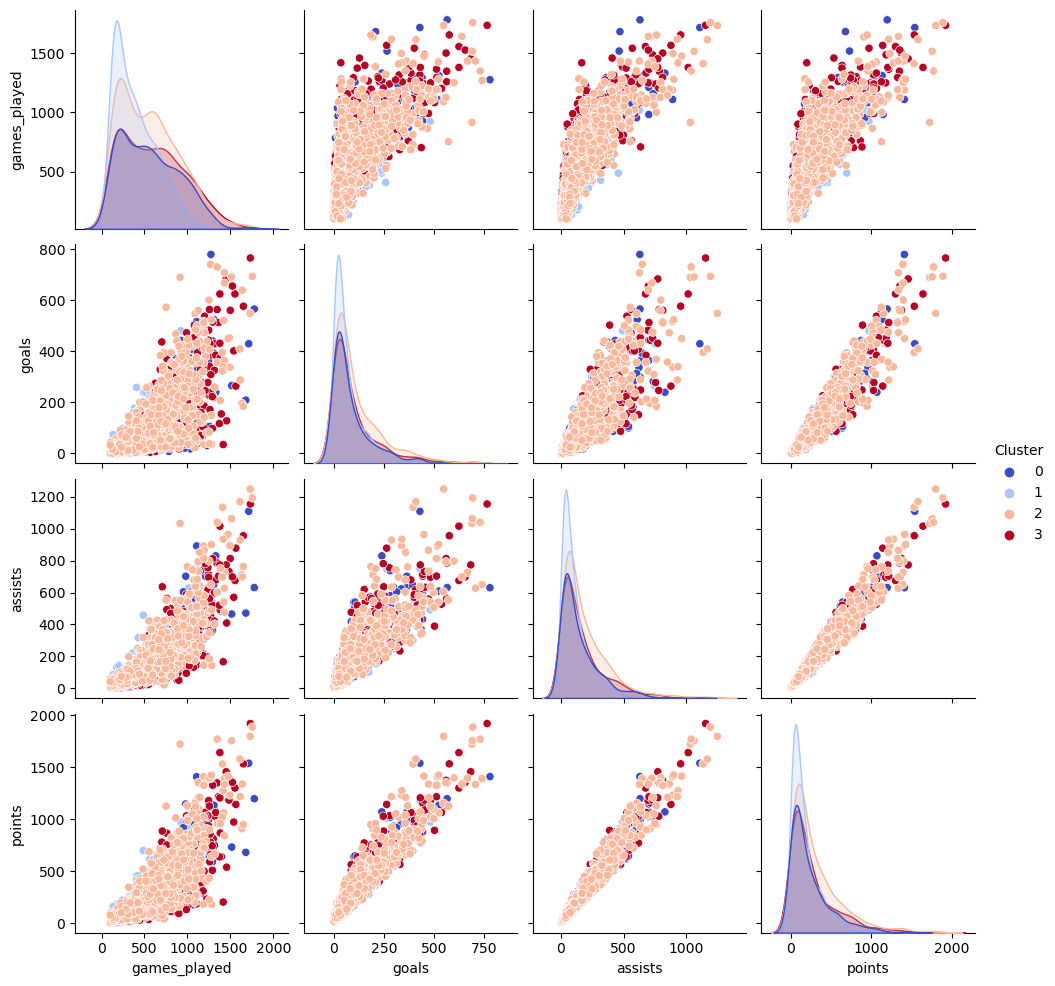

In [28]:
sns.pairplot(a, hue="Cluster", palette="coolwarm")

In [29]:
df_goalies = df[df['position'] == 'G']

In [30]:
df_goalies = df_goalies[df_goalies['goalie_games_played'] >= 50]

In [31]:
df_goalies1 = df_goalies[['goalie_games_played', 'goalie_wins', 'goalie_losses', 'save_percentage', 'goals_against_average', 'Hall Of Famer', '100+ Wins', '350+ Wins', 'Top15Pick']]

In [32]:
df_goalies1 = df_goalies1.fillna(0)

In [33]:
df_goalies1.corr()

,goalie_games_played,goalie_wins,goalie_losses,save_percentage,goals_against_average,Hall Of Famer,100+ Wins,350+ Wins,Top15Pick
goalie_games_played,1.000000,0.969653,0.960494,0.259538,-0.281015,0.382491,0.703449,0.608852,0.140263
goalie_wins,0.969653,1.000000,0.868756,0.357023,-0.388680,0.413578,0.682014,0.669851,0.134723
goalie_losses,0.960494,0.868756,1.000000,0.150337,-0.151181,0.301405,0.673254,0.503390,0.131700
save_percentage,0.259538,0.357023,0.150337,1.000000,-0.940592,0.091487,0.292162,0.171217,0.039390
goals_against_average,-0.281015,-0.388680,-0.151181,-0.940592,1.000000,-0.105988,-0.312331,-0.209067,-0.040217
Hall Of Famer,0.382491,0.413578,0.301405,0.091487,-0.105988,1.000000,0.149742,0.398466,0.243580
100+ Wins,0.703449,0.682014,0.673254,0.292162,-0.312331,0.149742,1.000000,0.223071,0.058663
350+ Wins,0.608852,0.669851,0.503390,0.171217,-0.209067,0.398466,0.223071,1.000000,0.171751
Top15Pick,0.140263,0.134723,0.131700,0.039390,-0.040217,0.243580,0.058663,0.171751,1.000000


<AxesSubplot:>

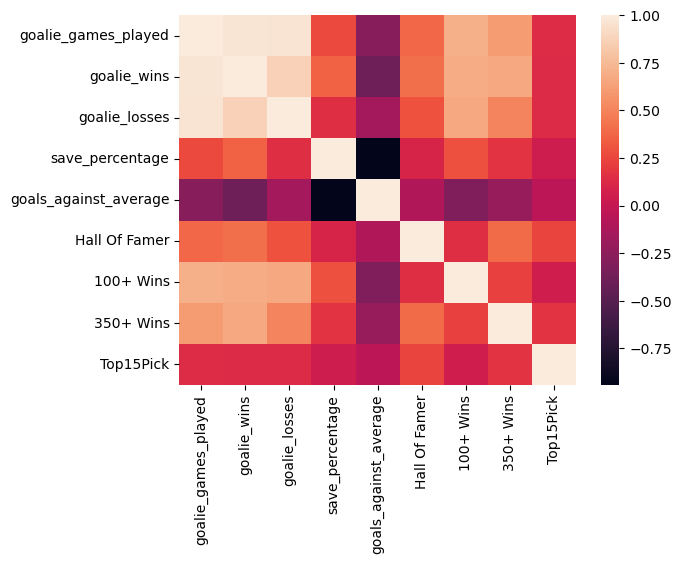

In [34]:
sns.heatmap(df_goalies1.corr())

In [35]:
df_goalies1.reset_index()

,index,goalie_games_played,goalie_wins,goalie_losses,save_percentage,goals_against_average,Hall Of Famer,100+ Wins,350+ Wins,Top15Pick
0,1362,146.0,62.0,61.0,0.905,2.97,0,0,0,0
1,1567,130.0,55.0,51.0,0.907,2.94,0,0,0,0
2,1772,136.0,67.0,53.0,0.912,2.84,0,0,0,0
3,1812,120.0,48.0,44.0,0.913,2.88,0,0,0,0
4,1990,159.0,93.0,47.0,0.915,2.57,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
215,12068,416.0,192.0,143.0,0.883,3.27,0,1,0,0
216,12128,298.0,92.0,136.0,0.881,3.79,0,0,0,1
217,12133,286.0,88.0,125.0,0.879,3.65,0,0,0,1
218,12174,439.0,149.0,198.0,0.884,3.53,0,1,0,1


In [36]:
index1 = df_goalies1.index

C:\Users\asamm\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asamm\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asamm\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asamm\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

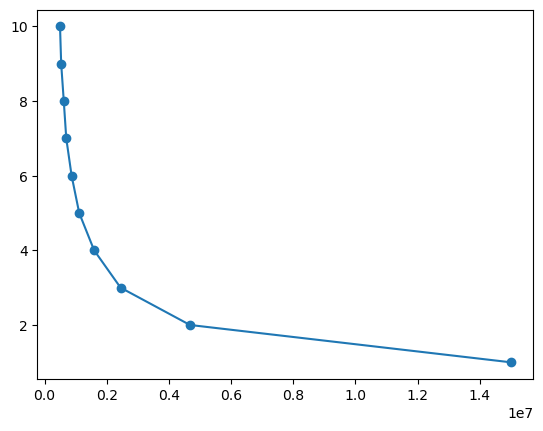

In [37]:
inertias = []
cluster_range = range(1,11)
for i in cluster_range:
    kmeans = KMeans(init='random',n_clusters=i,n_init=25,random_state=42).fit(df_goalies1)
    inertias.append(kmeans.inertia_)
    
plt.figure()   
plt.plot(inertias,cluster_range,marker='o')
plt.show()

In [39]:
kmeans_sel1 = KMeans(init='random',n_clusters=3,n_init=25,random_state=42).fit(df_goalies1)
labels1 = pd.DataFrame(kmeans_sel1.labels_)
goalie_cluster = df_goalies1.join(labels1)

C:\Users\asamm\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
df_goalies1 = df_goalies1.reset_index()

In [41]:
df_goalies1 = df_goalies1.drop(['index'], axis=1)

In [42]:
goalie_cluster = df_goalies1.join(labels1)

In [43]:
goalie_cluster

,goalie_games_played,goalie_wins,goalie_losses,save_percentage,goals_against_average,Hall Of Famer,100+ Wins,350+ Wins,Top15Pick,0
0,146.0,62.0,61.0,0.905,2.97,0,0,0,0,2
1,130.0,55.0,51.0,0.907,2.94,0,0,0,0,2
2,136.0,67.0,53.0,0.912,2.84,0,0,0,0,2
3,120.0,48.0,44.0,0.913,2.88,0,0,0,0,2
4,159.0,93.0,47.0,0.915,2.57,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
215,416.0,192.0,143.0,0.883,3.27,0,1,0,0,0
216,298.0,92.0,136.0,0.881,3.79,0,0,0,1,2
217,286.0,88.0,125.0,0.879,3.65,0,0,0,1,2
218,439.0,149.0,198.0,0.884,3.53,0,1,0,1,0


In [48]:
goalie_cluster = goalie_cluster.rename({0: 'Cluster'}, axis=1)
goalie_cluster

,goalie_games_played,goalie_wins,goalie_losses,save_percentage,goals_against_average,Hall Of Famer,100+ Wins,350+ Wins,Top15Pick,Cluster
0,146.0,62.0,61.0,0.905,2.97,0,0,0,0,2
1,130.0,55.0,51.0,0.907,2.94,0,0,0,0,2
2,136.0,67.0,53.0,0.912,2.84,0,0,0,0,2
3,120.0,48.0,44.0,0.913,2.88,0,0,0,0,2
4,159.0,93.0,47.0,0.915,2.57,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
215,416.0,192.0,143.0,0.883,3.27,0,1,0,0,0
216,298.0,92.0,136.0,0.881,3.79,0,0,0,1,2
217,286.0,88.0,125.0,0.879,3.65,0,0,0,1,2
218,439.0,149.0,198.0,0.884,3.53,0,1,0,1,0


In [49]:
grouped_cluster = goalie_cluster.groupby(['Cluster']).mean().round(2)
grouped_cluster

,goalie_games_played,goalie_wins,goalie_losses,save_percentage,goals_against_average,Hall Of Famer,100+ Wins,350+ Wins,Top15Pick
Cluster,,,,,,,,,
0,423.05,185.03,159.41,0.90,2.90,0.03,1.0,0.00,0.12
1,742.90,345.80,273.54,0.90,2.86,0.15,1.0,0.41,0.17
2,192.17,75.32,75.28,0.89,3.16,0.00,0.2,0.00,0.08


In [50]:
goalie_cluster['Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      2
3      2
4      2
      ..
215    0
216    2
217    2
218    0
219    0
Name: Cluster, Length: 220, dtype: int32>